### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
print(data.isnull().any())

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
missing_car_values = data['car'].isnull().sum()
missing_Bar_values = data['Bar'].isnull().sum()
missing_CoffeeHouse_values = data['CoffeeHouse'].isnull().sum()
missing_CarryAway_values = data['CarryAway'].isnull().sum()
missing_RestaurantLessThan20_values = data['RestaurantLessThan20'].isnull().sum()
print(missing_car_values, missing_Bar_values, missing_CoffeeHouse_values, missing_CarryAway_values, missing_RestaurantLessThan20_values)

12576 107 217 151 130


In [6]:
data_clean = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20'])

4. What proportion of the total observations chose to accept the coupon?



In [7]:
proportion_accepted = data_clean['Y'].mean()
print(proportion_accepted)

0.5687832855387136


5. Use a bar plot to visualize the `coupon` column.

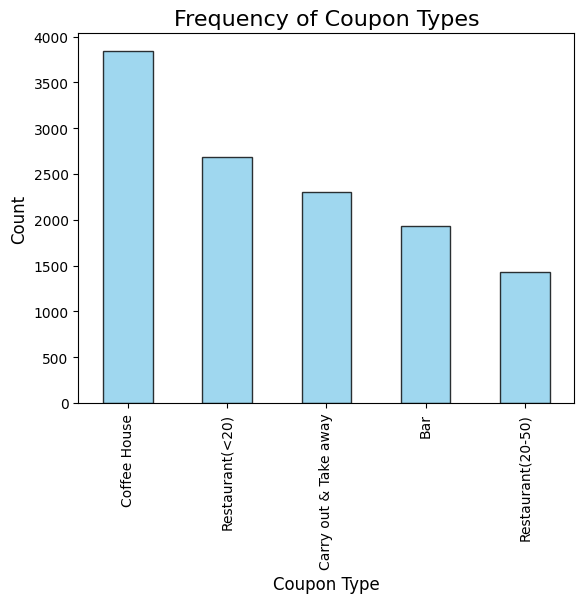

In [8]:
coupon_counts = data_clean['coupon'].value_counts()
coupon_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add labels and title
plt.title('Frequency of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

6. Use a histogram to visualize the temperature column.

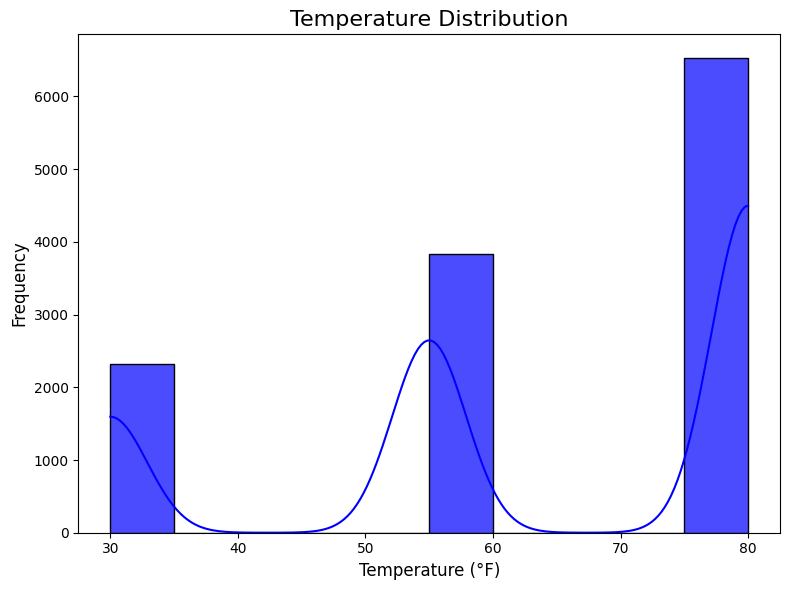

In [9]:
plt.figure(figsize=(8, 6))  # Optional: Set figure size
sns.histplot(data['temperature'], kde=True, bins=10, color='blue', alpha=0.7)

# Add labels and title
plt.title('Temperature Distribution', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar_coupons = data_clean[data_clean['coupon'] == 'Bar']

# Display the new DataFrame
print("Filtered DataFrame with only 'bar' coupons:")
print(bar_coupons)

Filtered DataFrame with only 'bar' coupons:
           destination  passanger weather  temperature  time coupon  \
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
39                Work      Alone   Sunny           55   7AM    Bar   
46     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
57                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration gender age maritalStatus  ...  CoffeeHouse CarryAway  \
24            1d   Male  21   

2. What proportion of bar coupons were accepted?


In [11]:
barcoupons_proportion_accepted = bar_coupons['Y'].mean()
print(barcoupons_proportion_accepted)

0.40939597315436244


In [38]:
coffeecoupon_proportion_accepted = data_clean[data_clean['coupon'] == 'Coffee House']['Y'].mean()
print(coffeecoupon_proportion_accepted)

0.49700754618787407


In [40]:
cheaprestaurant_proportion_accepted = data_clean[data_clean['coupon'] == 'Restaurant(<20)']['Y'].mean()
print(cheaprestaurant_proportion_accepted)

0.7087994034302759


In [41]:
carryout_proportion_accepted = data_clean[data_clean['coupon'] == 'Carry out & Take away']['Y'].mean()
print(carryout_proportion_accepted)

0.7374350086655113


In [42]:
nicerestaurant_proportion_accepted = data_clean[data_clean['coupon'] == 'Restaurant(20-50)']['Y'].mean()
print(nicerestaurant_proportion_accepted)

0.443205574912892


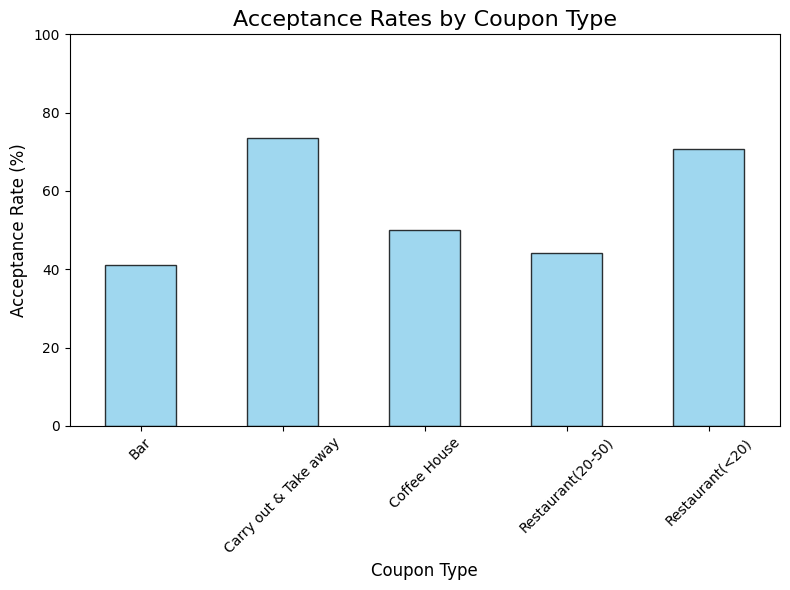

In [43]:
# Plot a chart of acceptance rates by coupon type
acceptance_rates = data.groupby('coupon')['Y'].mean() * 100  # Convert to percentage

# Plot the bar chart
plt.figure(figsize=(8, 6))
acceptance_rates.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add labels, title, and format the y-axis as percentages
plt.title('Acceptance Rates by Coupon Type', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.ylim(0, 100)  # Ensure the y-axis goes from 0 to 100
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
bar_coupons = bar_coupons.copy()
def bar_category(value):
    if value in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'

bar_coupons['Bar_Category'] = bar_coupons['Bar'].apply(bar_category)



# Calculate acceptance rate for each Bar_Category
acceptance_rates = bar_coupons.groupby('Bar_Category')['Y'].mean()

# Display the results
print("Acceptance rates for bar coupon by bar attendance category:")
print(acceptance_rates)

Acceptance rates for bar coupon by bar attendance category:
Bar_Category
3 or fewer     0.370413
more than 3    0.761658
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')
bar_coupons['Age_Category'] = np.where(bar_coupons['age'] > 25, 'over 25', 'under 25')
def bar_category(value):
    if value in ['never', 'less1']:
        return 'Less than 1'
    else:
        return 'More than 1'

bar_coupons['Bar_Category'] = bar_coupons['Bar'].apply(bar_category)



# Calculate acceptance rate for each Bar_Category
acceptance_rates = bar_coupons.groupby(['Age_Category', 'Bar_Category'])['Y'].mean()
print(acceptance_rates)

Age_Category  Bar_Category
over 25       Less than 1     0.286747
              More than 1     0.697674
under 25      Less than 1     0.299810
              More than 1     0.665254
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [14]:
# Define the criteria
def bar_more_than_once(value):
    return value in ['1~3', '4~8', 'gt8']

# Filter the data based on the criteria
filtered_data = data[
    (data['Bar'].apply(bar_more_than_once)) &
    (data['passanger'] != 'Kid(s)') & (data['passanger'] != 'Alone') &
    (data['occupation'] != 'Farming, Fishing, or Forestry')
]

# Calculate the acceptance rate
acceptance_rate = filtered_data['Y'].mean()

# Display the result
print("Acceptance rate for the specified group:")
print(acceptance_rate)

Acceptance rate for the specified group:
0.6902404526166902


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [17]:
# Filter for group 1: Drivers who go to bars > 1/month, passengers are not kids, and not widowed
group1 = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (data['passanger'].isin(['Friend(s)', 'Partner'])) &
    (data['maritalStatus'] != 'widowed')
]

# Filter for group 2: Drivers who go to bars > 1/month and are under age 30
group2 = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (data['age'].isin(['21', '26']))
]

# Filter for group 3: Go to cheap restaurants > 4 times/month and income < $50K
group3 = data[
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]

# Calculate acceptance rates for each group
group1_rate = group1['Y'].mean()
group2_rate = group2['Y'].mean()
group3_rate = group3['Y'].mean()

# Display the results
print("Acceptance rate for group 1 (Bars >1/month, no kids, not widowed):", group1_rate)
print("Acceptance rate for group 2 (Bars >1/month and under 30):", group2_rate)
print("Acceptance rate for group 3 (Cheap restaurants >4/month and income <50K):", group3_rate)

Acceptance rate for group 1 (Bars >1/month, no kids, not widowed): 0.6902404526166902
Acceptance rate for group 2 (Bars >1/month and under 30): 0.6284549161758043
Acceptance rate for group 3 (Cheap restaurants >4/month and income <50K): 0.6007020623080298


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, it appears that people who report going to a bar more than once a month and are under 30 with no kids have a higher acceptance rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [21]:
data_clean.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [22]:
coffee_house_data = data_clean[data_clean['coupon'] == 'Coffee House']

# Calculate the acceptance rate
coffee_house_acceptance_rate = coffee_house_data['Y'].mean()

# Display the result
print(f"Acceptance rate for the 'Coffee House' coupon: {coffee_house_acceptance_rate:.2%}")

Acceptance rate for the 'Coffee House' coupon: 49.70%


In [25]:
#Now I am comparing the Coffee coupon acceptance rate for people based on destination - so comparing acceptance rates for No Urgent Place v Home v Work
# Filter for Coffee House coupons
coffee_house_data = data_clean[data_clean['coupon'] == 'Coffee House']

# Filter further for each destination
no_urgent_place_data = coffee_house_data[coffee_house_data['destination'] == 'No Urgent Place']
work_data = coffee_house_data[coffee_house_data['destination'] == 'Work']
home_data = coffee_house_data[coffee_house_data['destination'] == 'Home']

# Calculate acceptance rates
no_urgent_place_acceptance_rate = no_urgent_place_data['Y'].mean()
work_acceptance_rate = work_data['Y'].mean()
home_acceptance_rate = home_data['Y'].mean()

# Display the results
print(f"Acceptance rate for 'Coffee House' coupon (NoUrgentPlace): {no_urgent_place_acceptance_rate:.2%}")
print(f"Acceptance rate for 'Coffee House' coupon (Work): {work_acceptance_rate:.2%}")
print(f"Acceptance rate for 'Coffee House' coupon (Home): {home_acceptance_rate:.2%}")

Acceptance rate for 'Coffee House' coupon (NoUrgentPlace): 57.77%
Acceptance rate for 'Coffee House' coupon (Work): 44.39%
Acceptance rate for 'Coffee House' coupon (Home): 36.31%


In [26]:
#Now I am comparing the Coffee coupon acceptance rate for people who report 'No Urgent Place' as their destination and based on the temperature
coffee_house_no_urgent = data_clean[(data_clean['coupon'] == 'Coffee House') & (data_clean['destination'] == 'No Urgent Place')]

# Filter for each temperature condition
temp_30_data = coffee_house_no_urgent[coffee_house_no_urgent['temperature'] == 30]
temp_55_data = coffee_house_no_urgent[coffee_house_no_urgent['temperature'] == 55]
temp_80_data = coffee_house_no_urgent[coffee_house_no_urgent['temperature'] == 80]

# Calculate acceptance rates
temp_30_acceptance_rate = temp_30_data['Y'].mean()
temp_55_acceptance_rate = temp_55_data['Y'].mean()
temp_80_acceptance_rate = temp_80_data['Y'].mean()

# Display the results
print(f"Acceptance rate for 'Coffee House' coupon (No Urgent Place, Temp=30): {temp_30_acceptance_rate:.2%}")
print(f"Acceptance rate for 'Coffee House' coupon (No Urgent Place, Temp=55): {temp_55_acceptance_rate:.2%}")
print(f"Acceptance rate for 'Coffee House' coupon (No Urgent Place, Temp=80): {temp_80_acceptance_rate:.2%}")


Acceptance rate for 'Coffee House' coupon (No Urgent Place, Temp=30): 53.49%
Acceptance rate for 'Coffee House' coupon (No Urgent Place, Temp=55): 54.90%
Acceptance rate for 'Coffee House' coupon (No Urgent Place, Temp=80): 59.15%


In [30]:
#Now I am comparing the Coffee coupon acceptance rate for people going to 'No Urgent Place' when it is before noon and when it is afternoon
coffee_house_acceptance = data_clean[(data_clean['coupon'] == 'Coffee House') & (data_clean['destination'] == 'No Urgent Place')]

# Filter for morning and afternoon times
morning_data = coffee_house_acceptance[coffee_house_acceptance['time'].isin(['7AM', '10AM'])]
afternoon_data = coffee_house_acceptance[coffee_house_acceptance['time'].isin(['2PM', '6PM'])]

# Calculate acceptance rates
morning_acceptance_rate = morning_data['Y'].mean()
afternoon_acceptance_rate = afternoon_data['Y'].mean()

# Display the results
print(f"Acceptance rate for 'Coffee House' coupon (No Urgent Place, Morning): {morning_acceptance_rate:.2%}")
print(f"Acceptance rate for 'Coffee House' coupon (No Urgent Place, Afternoon): {afternoon_acceptance_rate:.2%}")


Acceptance rate for 'Coffee House' coupon (No Urgent Place, Morning): 63.54%
Acceptance rate for 'Coffee House' coupon (No Urgent Place, Afternoon): 52.27%


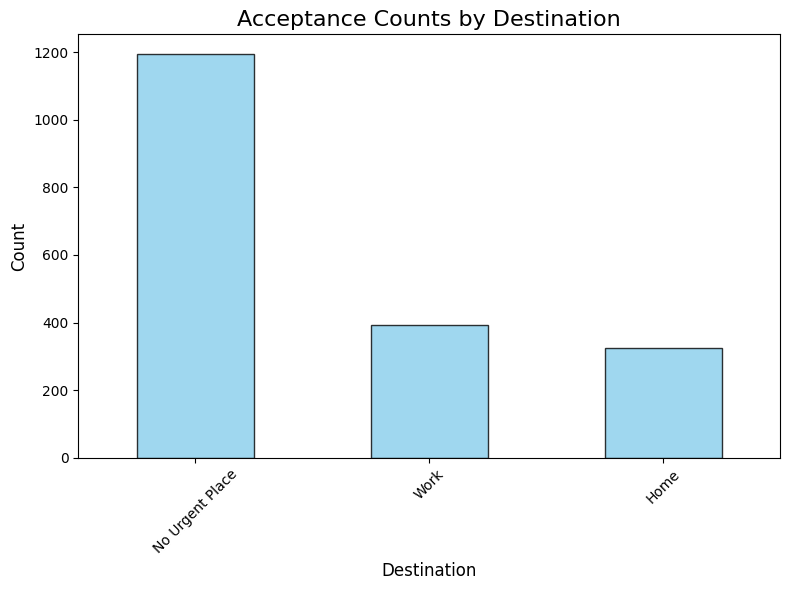

In [31]:
#barchart for acceptance counts by 'destination'
# Acceptance Counts by Destination
# -----------------------------

# Filter for Coffee House coupon
coffee_house_data = data_clean[data_clean['coupon'] == 'Coffee House']

# Calculate acceptance counts by destination
acceptance_counts = coffee_house_data[coffee_house_data['Y'] == 1]['destination'].value_counts()

# Plot the clustered bar chart for acceptance counts
plt.figure(figsize=(8, 6))
acceptance_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Acceptance Counts by Destination', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-37-3851c79e3dbf>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rates_by_time = coffee_house_data.groupby('time')['Y'].mean()


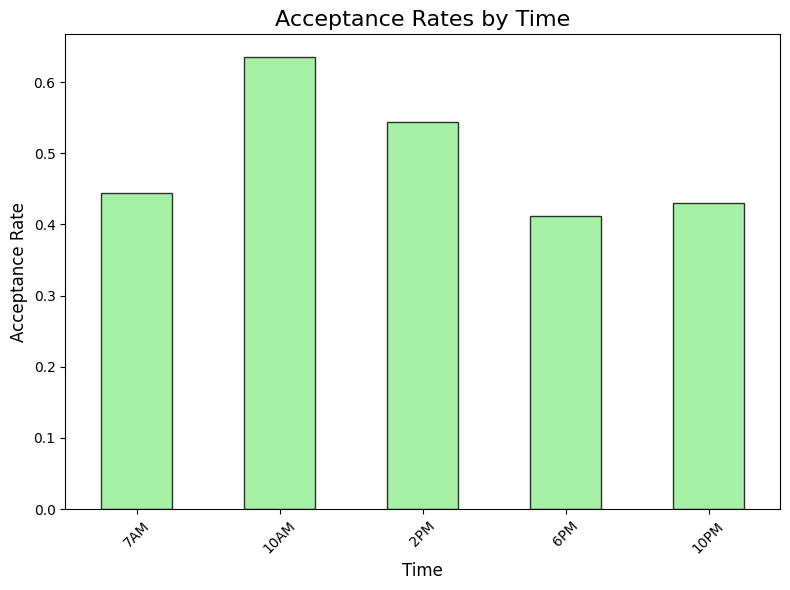

In [37]:
# Acceptance Rates by Time
# -----------------------------

coffee_house_data = coffee_house_data.copy()

# Set a specific order for the 'time' column
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
coffee_house_data['time'] = pd.Categorical(coffee_house_data['time'], categories=time_order, ordered=True)

# Calculate acceptance rates by time
acceptance_rates_by_time = coffee_house_data.groupby('time')['Y'].mean()

# Plot the bar chart for acceptance rates
plt.figure(figsize=(8, 6))
acceptance_rates_by_time.plot(kind='bar', color='lightgreen', edgecolor='black', alpha=0.8)
plt.title('Acceptance Rates by Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()